In [1]:
##########################################################
##################  GO enrich ############################
##########################################################

In [2]:
############## nr1d1 unique ####################

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from gprofiler import GProfiler

# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# Define a function to perform GO enrichment analysis and return results
def perform_go_enrichment(file_path):
    df = pd.read_csv(file_path)
    gene_list = df['CycID'].tolist()
    results = gp.profile(organism='mmusculus', query=gene_list, sources=['GO'], all_results=True)
    results['enrichment_ratio'] = (results['intersection_size'] / len(gene_list)) / (results['term_size'] / results['effective_domain_size'])
    results['is_significant'] = results['p_value'] < 0.05
    return results

# Perform GO enrichment analysis for each gene list and save the results to CSV files
def save_results_to_csv(file_path, csv_output_path):
    results = perform_go_enrichment(file_path)
    results.to_csv(csv_output_path, index=False)

# Replace 'your_file_path.txt' with your actual file paths and 'your_output_path.csv' with your desired CSV output paths
save_results_to_csv('nr1d1_dependent_modify_genelist.txt', 'nr1d1_results.csv')
save_results_to_csv('hdac3_dependent_modify_genelist.txt', 'hdac3_results.csv')
save_results_to_csv('nfil3_dependent_modify_genelist.txt', 'nfil3_results.csv')


def preprocess_df(df):
    df['p_value'].replace(0, np.nextafter(0, 1), inplace=True)
    df['neg_log_p_value'] = -np.log10(df['p_value'])
    return df

df_hdac3 = preprocess_df(pd.read_csv('hdac3_results.csv'))
df_nr1d1 = preprocess_df(pd.read_csv('nr1d1_results.csv'))
df_nfil3 = preprocess_df(pd.read_csv('nfil3_results.csv'))


C:\Users\xueke\AppData\Local\Temp\ipykernel_7280\951203741.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=np.linspace(0, 1, 11), label='-Log10(p-value) Scale')
C:\Users\xueke\AppData\Local\Temp\ipykernel_7280\951203741.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


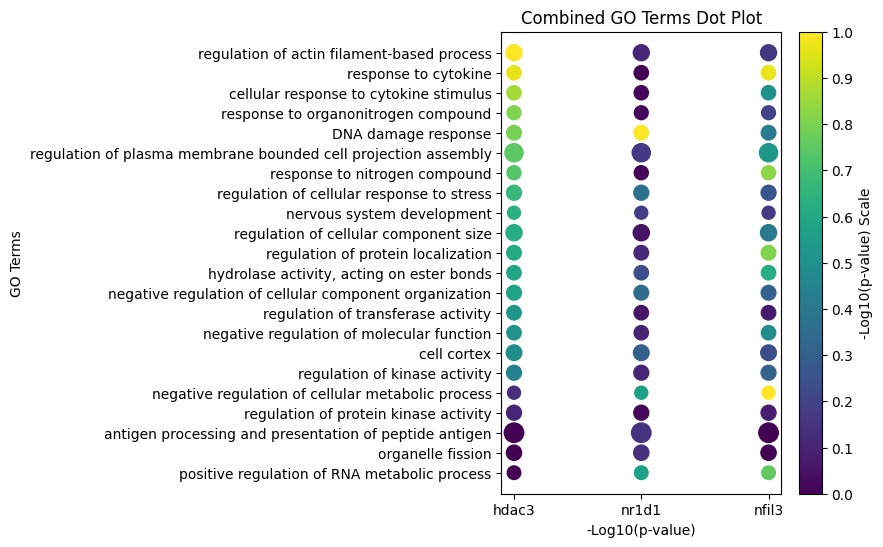

In [9]:

# Further filter out GO terms that are significant in 'nr1d1_results' but not in the other two results
significant_nr1d1_terms = df_nr1d1[df_nr1d1['is_significant']]
non_significant_hdac3_terms = df_hdac3[~df_hdac3['is_significant']]
non_significant_nfil3_terms = df_nfil3[~df_nfil3['is_significant']]

# Retrieve the names of these GO terms
significant_nr1d1_term_names = set(significant_nr1d1_terms['name'])

# Use these GO term names to filter the other two results
df_hdac3_common = non_significant_hdac3_terms[non_significant_hdac3_terms['name'].isin(significant_nr1d1_term_names)].head(120)
df_nfil3_common = non_significant_nfil3_terms[non_significant_nfil3_terms['name'].isin(significant_nr1d1_term_names)].head(120)

# Merge the three results
df_merged = df_hdac3_common.merge(df_nr1d1, on='name', suffixes=('_hdac3', '_nr1d1'))
df_merged = df_merged.merge(df_nfil3_common, on='name')
df_merged = df_merged[['name', 'neg_log_p_value_hdac3', 'neg_log_p_value_nr1d1', 'neg_log_p_value', 'enrichment_ratio_hdac3', 'enrichment_ratio_nr1d1', 'enrichment_ratio']]

plt.figure(figsize=(5, 6))

# Define the color map and normalizer for the scale 0-1
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=0, vmax=1)  # Assuming normalization between 0 and 1

# Plot each dataset with its corresponding label and size based on enrichment ratio
datasets = ['hdac3', 'nr1d1', 'nfil3']
for i, col in enumerate(['neg_log_p_value_hdac3', 'neg_log_p_value_nr1d1', 'neg_log_p_value']):
    scaled_values = (df_merged[col] - df_merged[col].min()) / (df_merged[col].max() - df_merged[col].min())
    colors = cmap(norm(scaled_values))
    sizes = df_merged['enrichment_ratio'] * 100  # Adjust the scale factor as needed
    plt.scatter([i]*len(df_merged), df_merged['name'], c=colors, s=sizes, label=datasets[i])

# Set the x-axis labels to the dataset names
plt.xticks(ticks=np.arange(len(datasets)), labels=datasets)

plt.xlabel('-Log10(p-value)')
plt.ylabel('GO Terms')
plt.title('Combined GO Terms Dot Plot')

# Create a colorbar with the specified norm and cmap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.linspace(0, 1, 11), label='-Log10(p-value) Scale')

plt.gca().invert_yaxis()
plt.tight_layout()  
plt.subplots_adjust(left=0.2)  

plt.savefig("nr1d1_unique_3col_goterms.pdf", format='pdf')
plt.show()



In [10]:
############## hdac3 unique ####################

C:\Users\xueke\AppData\Local\Temp\ipykernel_7280\839264116.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=np.linspace(0, 1, 11), label='-Log10(p-value) Scale')


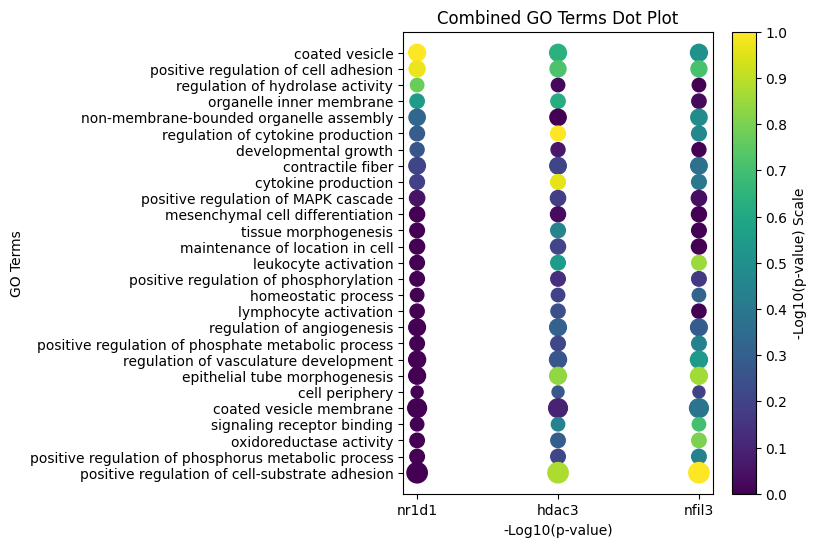

In [11]:
# Further filter out GO terms that are significant in 'hdac3_results' but not in the other two results
significant_hdac3_terms = df_hdac3[df_hdac3['is_significant']]
non_significant_nr1d1_terms = df_nr1d1[~df_nr1d1['is_significant']]
non_significant_nfil3_terms = df_nfil3[~df_nfil3['is_significant']]

# Retrieve the names of these GO terms
significant_hdac3_term_names = set(significant_hdac3_terms['name'])

# Use these GO term names to filter the other two results
df_nr1d1_common = non_significant_nr1d1_terms[non_significant_nr1d1_terms['name'].isin(significant_hdac3_term_names)].head(80)
df_nfil3_common = non_significant_nfil3_terms[non_significant_nfil3_terms['name'].isin(significant_hdac3_term_names)].head(80)

# Merge the three results
df_merged = df_nr1d1_common.merge(df_hdac3, on='name', suffixes=('_nr1d1', '_hdac3'))
df_merged = df_merged.merge(df_nfil3_common, on='name')
df_merged = df_merged[['name', 'neg_log_p_value_nr1d1', 'neg_log_p_value_hdac3', 'neg_log_p_value', 'enrichment_ratio_nr1d1', 'enrichment_ratio_hdac3', 'enrichment_ratio']]

plt.figure(figsize=(5, 6))

# Define the color map and normalizer for the scale 0-1
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=0, vmax=1)  # Assuming normalization between 0 and 1

# Plot each dataset with its corresponding label and size based on enrichment ratio
datasets = ['nr1d1', 'hdac3', 'nfil3']
for i, col in enumerate(['neg_log_p_value_nr1d1', 'neg_log_p_value_hdac3', 'neg_log_p_value']):
    scaled_values = (df_merged[col] - df_merged[col].min()) / (df_merged[col].max() - df_merged[col].min())
    colors = cmap(norm(scaled_values))
    sizes = df_merged['enrichment_ratio'] * 100  # Adjust the scale factor as needed
    plt.scatter([i]*len(df_merged), df_merged['name'], c=colors, s=sizes, label=datasets[i])

# Set the x-axis labels to the dataset names
plt.xticks(ticks=np.arange(len(datasets)), labels=datasets)

plt.xlabel('-Log10(p-value)')
plt.ylabel('GO Terms')
plt.title('Combined GO Terms Dot Plot')

# Create a colorbar with the specified norm and cmap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.linspace(0, 1, 11), label='-Log10(p-value) Scale')

plt.gca().invert_yaxis()

plt.savefig("hdac3_unique_3col_goterms.pdf", format='pdf')
plt.show()


In [12]:
############## nfil3 unique ####################

C:\Users\xueke\AppData\Local\Temp\ipykernel_7280\2775106453.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_significant_hdac3_terms = df_nfil3[~df_hdac3['is_significant']]
C:\Users\xueke\AppData\Local\Temp\ipykernel_7280\2775106453.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=np.linspace(0, 1, 11), label='-Log10(p-value) Scale')


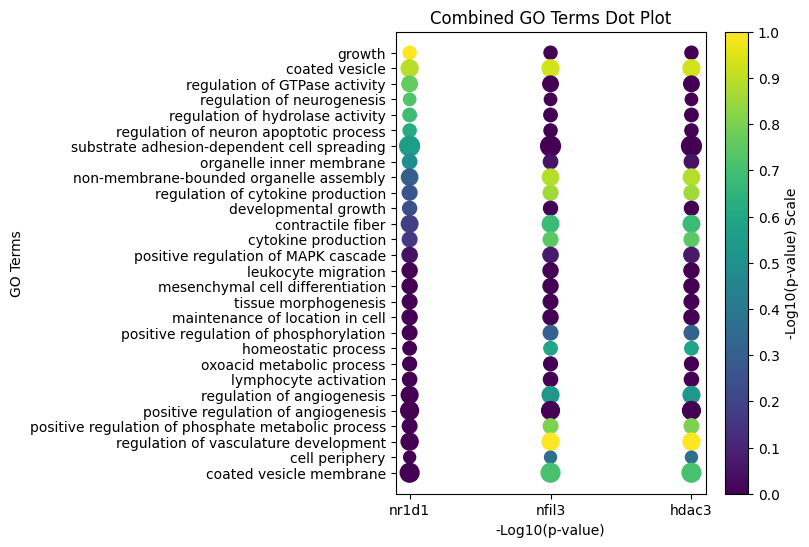

In [13]:
# Further filter out GO terms that are significant in 'hdac3_results' but not in the other two results
significant_nfil3_terms = df_hdac3[df_hdac3['is_significant']]
non_significant_nr1d1_terms = df_nr1d1[~df_nr1d1['is_significant']]
non_significant_hdac3_terms = df_nfil3[~df_hdac3['is_significant']]

# Retrieve the names of these GO terms
significant_nfil3_term_names = set(significant_nfil3_terms['name'])

# Use these GO term names to filter the other two results
df_nr1d1_common = non_significant_nr1d1_terms[non_significant_nr1d1_terms['name'].isin(significant_nfil3_term_names)].head(70)
df_hdac3_common = non_significant_hdac3_terms[non_significant_hdac3_terms['name'].isin(significant_nfil3_term_names)].head(70)

# Merge the three results
df_merged = df_nr1d1_common.merge(df_nfil3, on='name', suffixes=('_nr1d1', '_nfil3'))
df_merged = df_merged.merge(df_hdac3_common, on='name')
df_merged = df_merged[['name', 'neg_log_p_value_nr1d1', 'neg_log_p_value_nfil3', 'neg_log_p_value', 'enrichment_ratio_nr1d1', 'enrichment_ratio_nfil3', 'enrichment_ratio']]

plt.figure(figsize=(5, 6))

# Define the color map and normalizer for the scale 0-1
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=0, vmax=1)  # Assuming normalization between 0 and 1

# Plot each dataset with its corresponding label and size based on enrichment ratio
datasets = ['nr1d1', 'nfil3', 'hdac3']
for i, col in enumerate(['neg_log_p_value_nr1d1', 'neg_log_p_value_nfil3', 'neg_log_p_value']):
    scaled_values = (df_merged[col] - df_merged[col].min()) / (df_merged[col].max() - df_merged[col].min())
    colors = cmap(norm(scaled_values))
    sizes = df_merged['enrichment_ratio'] * 100  # Adjust the scale factor as needed
    plt.scatter([i]*len(df_merged), df_merged['name'], c=colors, s=sizes, label=datasets[i])

# Set the x-axis labels to the dataset names
plt.xticks(ticks=np.arange(len(datasets)), labels=datasets)

plt.xlabel('-Log10(p-value)')
plt.ylabel('GO Terms')
plt.title('Combined GO Terms Dot Plot')

# Create a colorbar with the specified norm and cmap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.linspace(0, 1, 11), label='-Log10(p-value) Scale')

plt.gca().invert_yaxis()
plt.savefig("nfil3_unique_3col_goterms.pdf", format='pdf')
plt.show()
